# Предварительные дейсвтия

In [1]:
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

# 1. Загрузите данные из файла data-logistic.csv. Это двумерная выборка, целевая переменная на которой принимает значения -1 или 1.

In [2]:
data = pn.read_csv('data-logistic.csv', header=None)
features = data.iloc[:, 1:]
target = data.iloc[:, 0]

# 2. Убедитесь, что выше выписаны правильные формулы для градентного спуска.
Обратите внимание, что мы используем полноценный градиентный спуск, а не его стохастический вариант.

In [3]:
def W1(features, target, k, C, w1: np.float128, w2: np.float128):
  S = 0
  l = len(target)
  for i in range(l):
    S += target[i] * features.loc[i, 1] * (1 - 1 / (1 + np.exp(-target[i] * (w1 * features.loc[i, 1] + w2 * features.loc[i, 2]))))
  return w1 + k * S / l - k * C * w1

def W2(features, target, k, C, w1, w2):
  S = 0
  l = len(target)
  for i in range(l):
    S += target[i] * features.loc[i, 2] * (1 - 1 / (1 + np.exp(-target[i] * (w1 * features.loc[i, 1] + w2 * features.loc[i, 2]))))
  return w2 + k * S / l - k * C * w2


# 3. 3. Реализуйте градиентный спуск для обычной и L2-регуляризованной(с коэффициентом регуляризации 10) логистической регрессии.
Используйте длину шага k=0.1. В качестве начального приближения используйте вектор (0, 0).

In [4]:
def Gradient(features, target, k, w1: np.float128, w2: np.float128, C, flag):
  eps = 1e-5
  max_iter = 1e+4
  msg = 0

  iter = 0
  while iter < max_iter:
    iter += 1
    w1_next = W1(features, target, k, C, w1, w2)
    w2_next = W2(features, target, k, C, w1, w2)

    distance = np.sqrt((w1 - w1_next) ** 2 + (w2 - w2_next) ** 2)

    if distance <= eps:
      msg = 1
      break

    w1 = w1_next
    w2 = w2_next

  if flag:
    return iter, msg

  return w1, w2

# 4. Запустите градиентный спуск и доведите до сходимости (евклидово расстояние между векторами весов на соседних итерациях должно быть не больше 1e-5).
Рекомендуется ограничить сверху число итераций десятью тысячами.

In [5]:
k = 0.1
w10 = w20 = 0

w1, w2 = Gradient(features, target, k, w10, w20, C=0, flag=False)
w1_l, w2_l = Gradient(features, target, k, w10, w20, C=10, flag=False)

# 5. Какое значение принимает AUC-ROC на обучении без регуляризации и при её использовании? Эти величины будут ответом на задание.
В качестве ответа приведите два числа через пробел.

In [6]:
a = lambda x, w1, w2: 1 / (1 + np.exp(-w1 * x.loc[:, 1] - w2 * x.loc[:, 2]))

y_test = a(features, w1, w2)
y_test_l = a(features, w1_l, w2_l)

print(round(roc_auc_score(target, y_test), 3), round(roc_auc_score(target, y_test_l), 3))

0.927 0.936


# 6. Попробуйте поменять длину шага. Будет ли сходиться алгоритм, если делать более длинные шаги? Как меняется число итераций при уменьшении длины шага?

Статистика сходимости:16/17


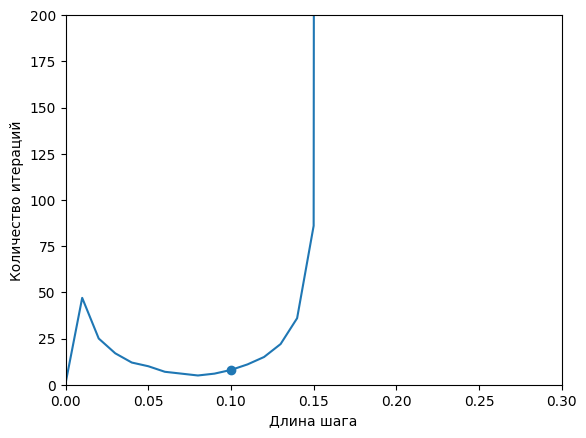

In [7]:
x = []
y = []
w10 = w20 = 0

n = 17
S = 0
for i in range(n):
  iter, msg = Gradient(features, target, i*0.01, w10, w20, C=10, flag=True)
  x.append(i * 0.01)
  y.append(iter)
  S += msg

print(f"Статистика сходимости:{S}/{n}")
plt.scatter(x[10], y[10])
plt.plot(x, y)
plt.xlabel("Длина шага")
plt.ylabel("Количество итераций")
plt.ylim(0, 200)
plt.xlim(0, 0.3)
plt.show()

# 7. Попробуйте менять начальное приближение. Влияет ли оно на что-нибудь?

Статистика сходимости:10/10


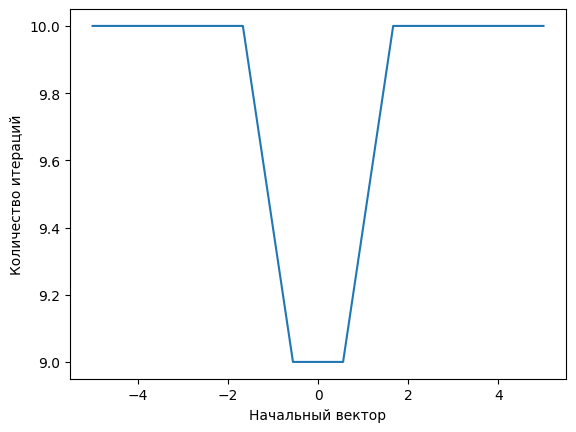

In [8]:
x = []
y = []

n = 10
S = 0
k = 0.1
for i in np.linspace(-5, 5, n):
  iter, msg = Gradient(features, target, k, i, i, C=10, flag=True)
  x.append(i)
  y.append(iter)
  S += msg

print(f"Статистика сходимости:{S}/{n}")
plt.plot(x, y)
plt.xlabel("Начальный вектор")
plt.ylabel("Количество итераций")
plt.show()